# Desafio 3 - Fundamentos de IA

## Bibliotecas

In [2]:
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Tratar Dados

In [3]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [4]:
df_vendas = pd.DataFrame.from_dict(dados_vendas)
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     12 non-null     object
 1   vendas  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


## Formatar Dados

In [5]:
df_vendas['mes_num'] = range(1,13)
df_vendas

,mes,vendas,mes_num
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3
3,Abril,2500,4
4,Maio,2600,5
5,Junho,2700,6
6,Julho,2800,7
7,Agosto,2900,8
8,Setembro,3000,9
9,Outubro,3100,10


## Treinar Modelo

In [6]:
X = pd.DataFrame(df_vendas.mes_num)
Y = df_vendas.vendas

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, train_size=0.2, random_state=42)

modelo = LinearRegression().fit(X_treino, Y_treino)

Y_pred = modelo.predict(X_teste)

print(f'R2 Score Treino = {modelo.score(X_treino, Y_treino)}')
print(f'\nR2 Score Teste = {r2_score(Y_teste, Y_pred)}')
print(f'\nMAE = {mean_absolute_error(Y_teste, Y_pred)}')

R2 Score Treino = 1.0

R2 Score Teste = 0.9666851749028318

MAE = 40.0


## Previsão de Vendas

In [20]:
previsaoDezembro = modelo.predict(pd.DataFrame.from_dict({'mes_num': [12]}))
print(f'Vendas de Dezembro previstas em: {int(previsaoDezembro[0])}')

Vendas de Dezembro previstas em: 3300


## Histograma

array([[<Axes: title={'center': 'vendas'}>,
        <Axes: title={'center': 'mes_num'}>]], dtype=object)

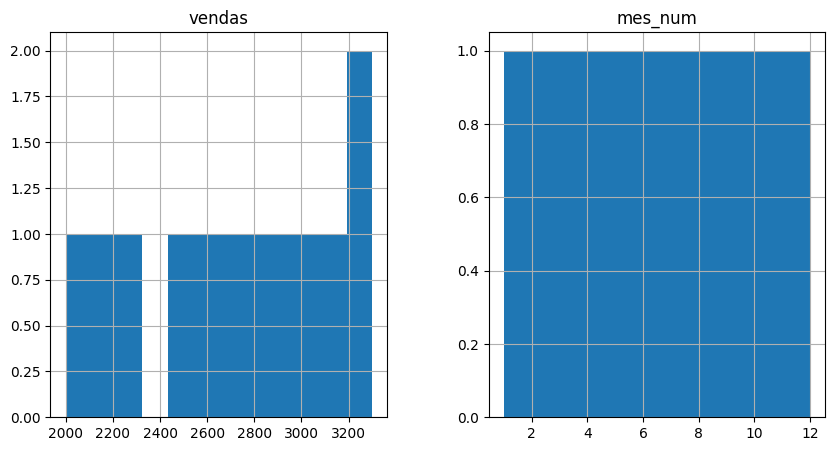

In [8]:
df_vendas.hist(bins=12, grid=True, figsize=(10,5))

## Scatter

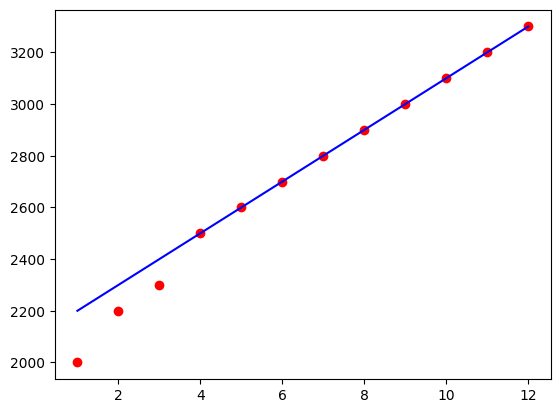

In [9]:
plt.scatter(df_vendas.mes_num, df_vendas.vendas, color='r')
plt.plot(df_vendas.mes_num, modelo.predict(df_vendas[['mes_num']]), color='b')